## Astropy to analyze FITS images

tutorial Lia Corrales

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

open fits

In [9]:
fname = "HorseHead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Primary block: numbered and can be accessed by indexing hdu_list

In [10]:
image_data = hdu_list[0].data

data is stored as a 2D numpy array

how do we know the dimensions?

In [11]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


close FITS (we have everything we need)

In [14]:
hdu_list.close()

Shortcut: use "getdata()" to read in the image data and close the file

In [15]:
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


show the data

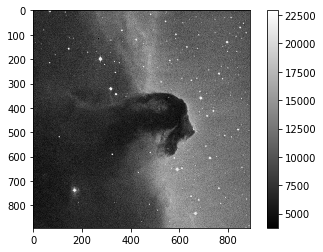

In [16]:
plt.imshow(image_data, cmap='gray')  #color map
plt.colorbar()                       #color bar

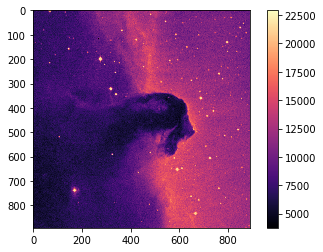

In [17]:
plt.imshow(image_data, cmap='magma')
plt.colorbar()

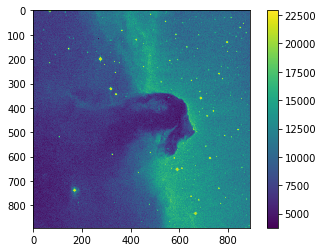

In [22]:
plt.imshow(image_data, cmap='viridis')
plt.colorbar()

statistics of the image

In [23]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


histogram

we need to cast the data from a 2D array to something one dimensiona

in this case, use the ndarray.flatten() to return 1D numpy array

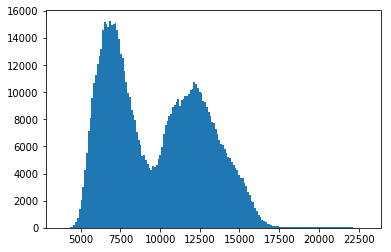

In [24]:
histogram= plt.hist(image_data.flatten(), bins='auto')

display the image with a logarithmic scale

In [25]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

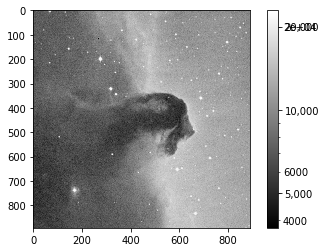

In [29]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

#choose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

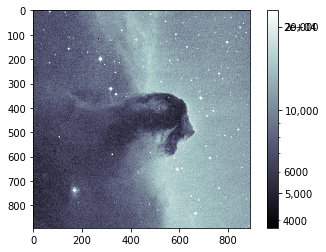

In [30]:
plt.imshow(image_data, cmap='bone', norm=LogNorm())

cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

Stacking Images

since the noise in an image results from a random process, stacking is used to separate images to improve the signal to noise ratio of objects observed

In [31]:
#stacking 5 images of M13 taken with a 10 in telescope

#make a list of file names
image_list = ['M13_blue_0001.fits','M13_blue_0002.fits','M13_blue_0003.fits',\
             'M13_blue_0004.fits','M13_blue_0005.fits']

In [34]:
#make an array of images from the list of images
image_concat = [fits.getdata(image) for image in image_list]

#for each entry in the image list, the loop will create a list of images from those files
print(len(image_concat))

5


In [35]:
#sum the images together
final_image = np.sum(image_concat, axis=0)

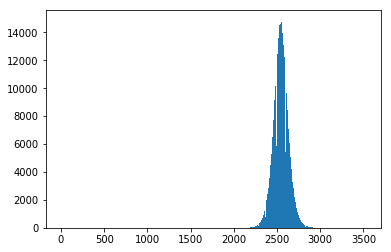

In [36]:
#plot a histogram of the imafe pixel values
image_hist = plt.hist(final_image.flatten(), bins='auto')

vmin and vmax to set the limits on the colors scaling for imshow

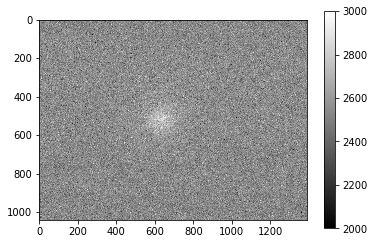

In [37]:
plt.imshow(final_image, cmap='gray', vmin=2E3, vmax=3E3)
plt.colorbar()

write a new FITS file

writeto() method

error if the file you are trying to write already exists

In [38]:
outfile = 'stacked_M13_blue.fits'
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)